/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


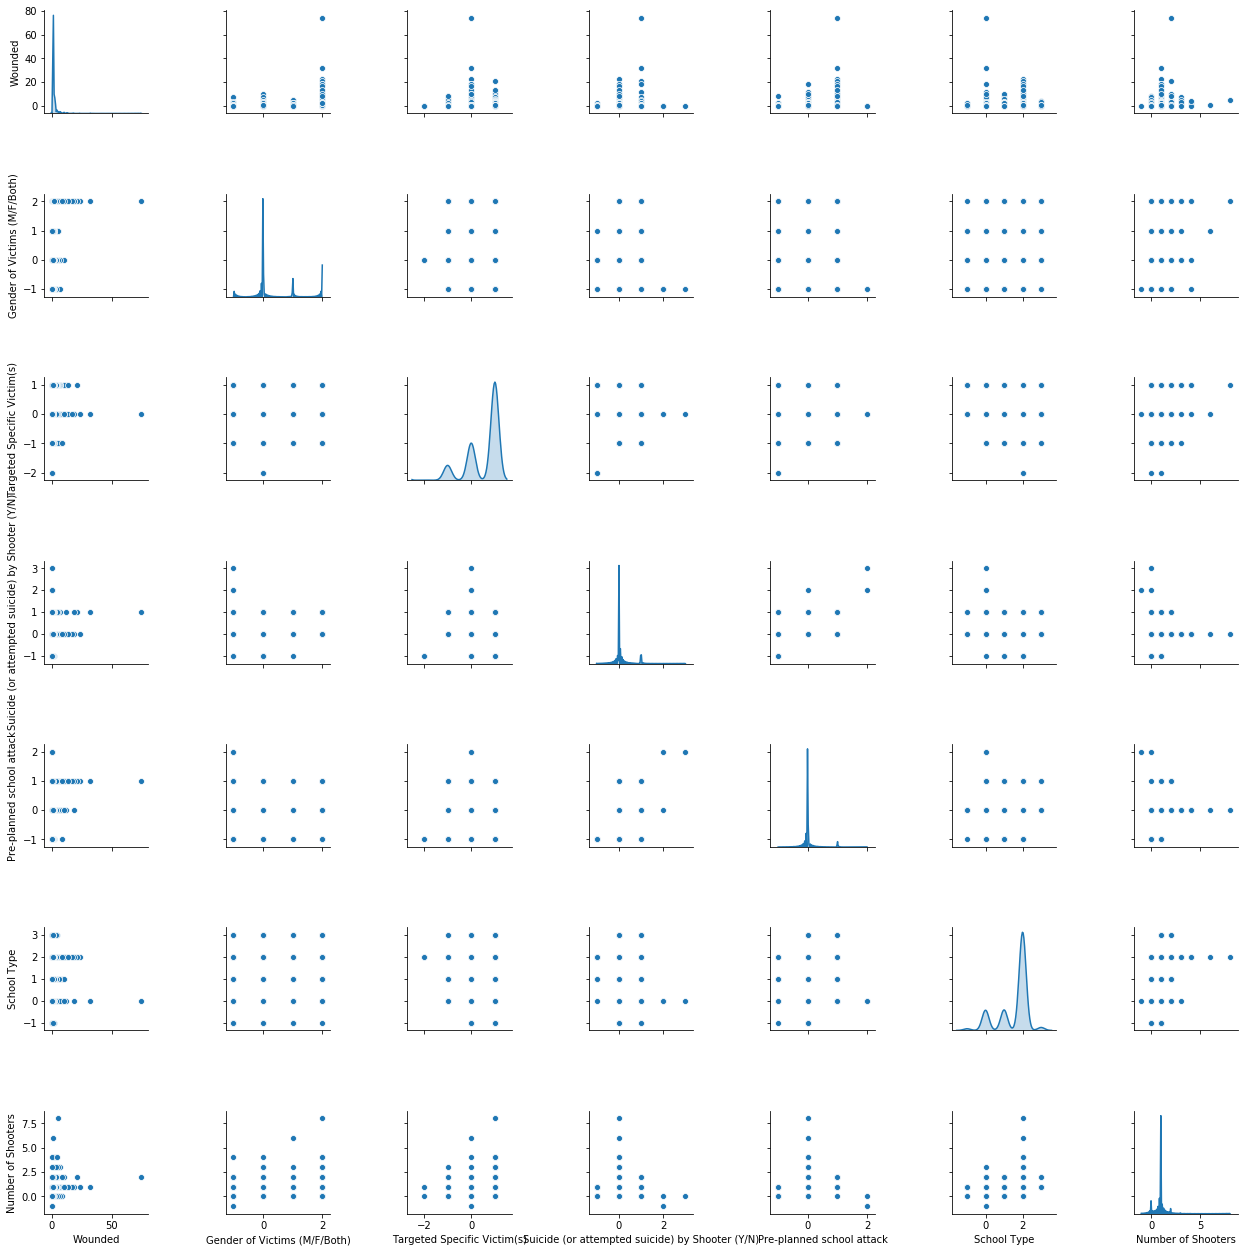

Coefficients: 
 [ 0.12462184  0.26284238  0.03335678  0.29011459  0.29222939 -0.07449199
 -0.08032249]
Variance score: 0.03


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


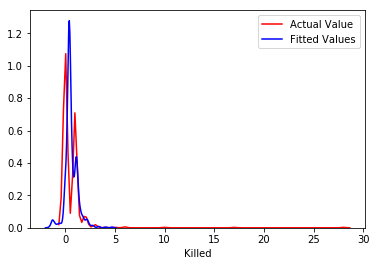

In [27]:
import pandas as pd
import numpy as np
import pprint as pp
from collections import OrderedDict
import requests
import json
import datetime
import spacy
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib


# File to Load (Remember to Change These)
file_to_load = "db/machineLearntCsvData.csv"
schoolData = pd.read_csv(file_to_load, encoding="utf-8-sig")
schoolData.reset_index()
schoolData.fillna(-1)
#schoolData.drop(schoolData.columns[0], axis=1)
schoolData.head()
schoolData = schoolData.drop(schoolData.columns[0], axis=1)
schoolData = schoolData.drop(schoolData.columns[5], axis=1)

schoolData.drop(0, inplace=True)

schoolData.head()
y = schoolData.Killed
X = schoolData.drop('Killed', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.5, 
                                                    random_state=123)

X_test.fillna(X_test.mean())
y_test.fillna(y_test.mean())

X_train.fillna(X_train.mean())
y_train.fillna(y_train.mean())


X_train_scaled = preprocessing.scale(X_train)

scaler = preprocessing.StandardScaler().fit(X_train)

X_test_scaled = scaler.transform(X_test)
 


import seaborn as sns
import matplotlib.pyplot as plt

features = X.columns.values
labels = ['']

dataset = schoolData[features + labels]

# Inspect the data
sns.pairplot(X[features], diag_kind="kde")
plt.show()

# Examine the overall statistics in the training set
train_stats = X_train.describe()
train_stats = train_stats.transpose()
train_stats

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_scaled, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test_scaled)

# The coefficients
print('Coefficients: \n', regr.coef_)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

import seaborn as sns

ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)